In [1]:
!pip install yfinance --quiet

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

import datetime


In [4]:
# Load Google stock data
df = yf.download('GOOG', start='2010-01-01', end='2022-12-31')
df = df[['Close']]
df.dropna(inplace=True)



[*********************100%***********************]  1 of 1 completed


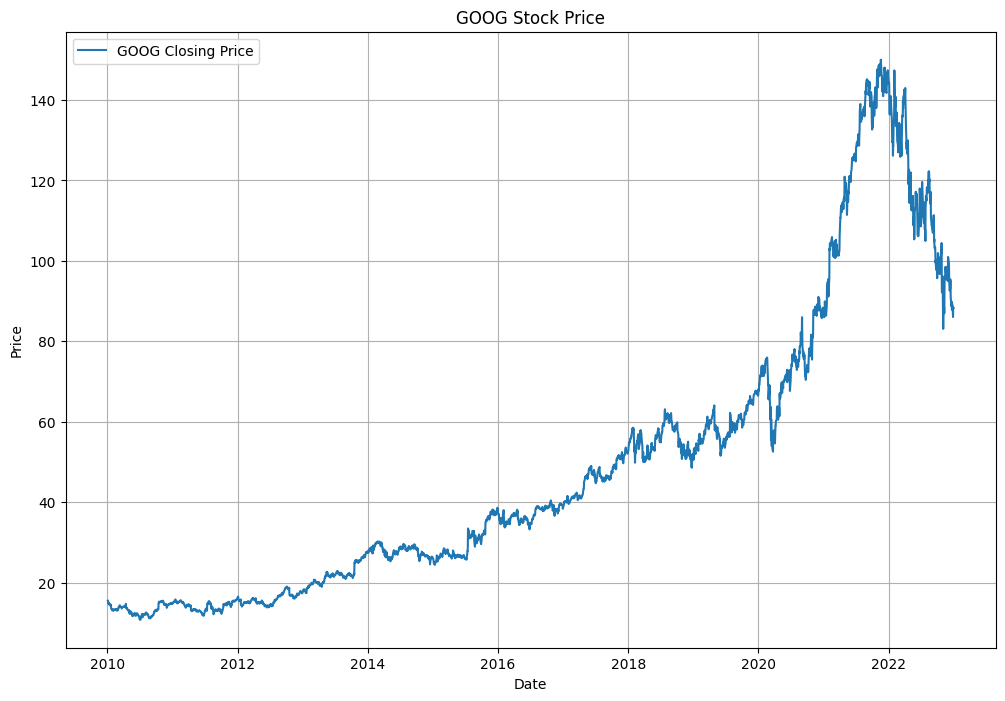

In [6]:
# Visualize
plt.figure(figsize=(12,8))
plt.plot(df, label='GOOG Closing Price')
plt.title('GOOG Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [8]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LEN = 60
X, y = create_sequences(scaled_data, SEQ_LEN)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [9]:
lstm_model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0152 - val_loss: 0.0021
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 1.0946e-04 - val_loss: 0.0011
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 9.4878e-05 - val_loss: 0.0010
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1.0257e-04 - val_loss: 0.0016
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 9.3970e-05 - val_loss: 0.0023
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 8.2614e-05 - val_loss: 0.0020
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 8.7795e-05 - val_loss: 0.0017
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 7.7186e-05 - val_loss: 0.0017
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 7.6482e-05 - val_loss: 0.0013
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.0248e-05 - val_loss: 9.8876e-04
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 7.6288e-05 - val_loss: 0.0017
Epoch 12/20
81/81 ━━━━━━━━━━━━

In [10]:
gru_model = Sequential([
    GRU(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
gru_history = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0145 - val_loss: 0.0017
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 5.4511e-05 - val_loss: 0.0013
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 5.4057e-05 - val_loss: 7.0847e-04
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 4.3237e-05 - val_loss: 6.5730e-04
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 4.6000e-05 - val_loss: 7.9943e-04
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 4.8505e-05 - val_loss: 5.2946e-04
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 4.2988e-05 - val_loss: 4.3120e-04
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 4.0609e-05 - val_loss: 4.3460e-04
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 4.1732e-05 - val_loss: 3.9827e-04
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 3.7131e-05 - val_loss: 3.9828e-04
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 3.3661e-05 - val_loss